<a href="https://colab.research.google.com/github/Brian13Noble/GIS/blob/main/ps2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Research Purpose**
The goal of this research was to investigate the impact of the increase in population on the education in Kenya. Specifically, I was interested in understanding how the population growth affects the new Competence Based Curriculum whose implementation is in progress. Presumably, population growth signficantly affects education on the account that it increases the enrollment rates in public schools, which leads to congestion and scramble for insufficient learning resources.    

In [336]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis
#!pip install geopandas matplotlib folium

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [337]:
!pip install mapclassify
import mapclassify #need for thematic map classification

credit_license.txt			      kenya_county_boundary.cst
drive					      kenya_county_boundary.dbf
kenya_administrative_province_boundaries.dbf  kenya_county_boundary.prj
kenya_administrative_province_boundaries.prj  kenya_county_boundary.shp
kenya_administrative_province_boundaries.shp  kenya_county_boundary.shx
kenya_administrative_province_boundaries.shx  kenya_prov.zip
kenya_administrative_province_boundaries.zip  sample_data
kenya_counties1.zip			      wfsrequest.txt
kenya_counties.zip


<Axes: >

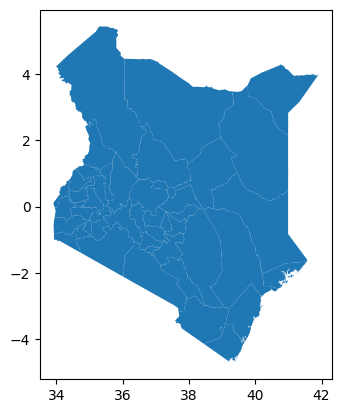

In [338]:
! wget -q -O kenya_counties.zip 'https://github.com/Brian13Noble/GIS/blob/main/kenya_county_boundary.zip'
!ls
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Datasets/kenya_county_boundary.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
kenya_counties=gpd.read_file('kenya_county_boundary.shp') #load the shapefile with gpd as kenya_counties
#Make the map
kenya_counties.plot()

In [339]:
kenya_counties.dtypes

OBJECTID       float64
AREA_          float64
PERIMETER      float64
COUNTY3_       float64
COUNTY3_ID     float64
COUNTY          object
Shape_Leng     float64
Shape_area     float64
Shape_len      float64
geometry      geometry
dtype: object

In [340]:
#from google.colab import drive
#drive.mount("/content/drive")
sec_enrollment = "/content/drive/MyDrive/Datasets/number-of-secondary-school-enrolment-by-county-2007-2013-csv-1.csv"
sec_enrollment = pd.read_csv(sec_enrollment)
#sec_enrollment

In [341]:
sec_enrollment['County'] = sec_enrollment['County'].str.capitalize()
#sec_enrollment

In [342]:
sec_enrollment.dtypes


County    object
2007       int64
2008       int64
2009       int64
2010       int64
2011       int64
2012       int64
2013       int64
dtype: object

In [343]:
sec_enrollment.loc[sec_enrollment['County'] == 'West pokot', 'County'] = 'West Pokot'
sec_enrollment.loc[sec_enrollment['County'] == 'Elgeyo marakwet', 'County'] = 'Keiyo-Marakwet'
sec_enrollment.loc[sec_enrollment['County'] == 'Homabay', 'County'] = 'Homa Bay'
sec_enrollment.loc[sec_enrollment['County'] == 'Taita taveta', 'County'] = 'Taita Taveta'
sec_enrollment.loc[sec_enrollment['County'] == 'Tana river', 'County'] = 'Tana River'
sec_enrollment.loc[sec_enrollment['County'] == 'Tharaka nithi', 'County'] = 'Tharaka'
sec_enrollment.loc[sec_enrollment['County'] == 'Trans nzoia', 'County'] = 'Trans Nzoia'
sec_enrollment.loc[sec_enrollment['County'] == 'Uasin gishu', 'County'] = 'Uasin Gishu'
#sec_enrollment


In [344]:
#Focus on no.of sec-school enrolment in 2007 and 2013
sec_enrollment= sec_enrollment[['County','2007','2013']]
sec_enrollment= sec_enrollment.iloc[0:,:]
#sec_enrollment


In [345]:
#sec_enrollment

In [346]:
#Calculate the enrollment change percentage between 2007 and 2013
sec_enrollment['ECHANGE'] = (sec_enrollment['2013'] - sec_enrollment['2007'])  / sec_enrollment['2013'] * 100
#print(sec_enrollment)

In [347]:
#sec_enrollment

In [348]:
kenya_counties = pd.merge(
    left=kenya_counties,
    right=sec_enrollment,
    left_on='COUNTY',
    right_on='County',
    how='outer', indicator=True
)

In [220]:
kenya_counties[['COUNTY','County','_merge']]

,COUNTY,County,_merge
0,Turkana,Turkana,both
1,Marsabit,Marsabit,both
2,Mandera,Mandera,both
3,Wajir,Wajir,both
4,West Pokot,West Pokot,both
5,Samburu,Samburu,both
6,Isiolo,Isiolo,both
7,Baringo,Baringo,both
8,Keiyo-Marakwet,Keiyo-Marakwet,both
9,Trans Nzoia,Trans Nzoia,both


In [221]:
#print(kenya_counties.info())

In [222]:
#kenya_counties.head(1)

<Axes: >

[]

[]

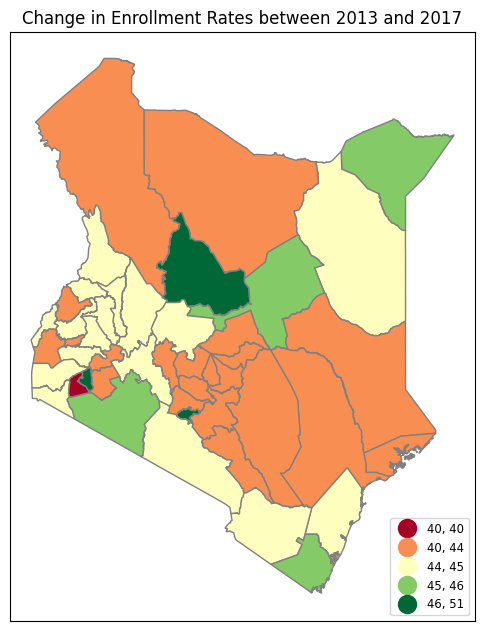

In [224]:
fig, ax = plt.subplots(1, figsize=(6,10))
kenya_counties.plot(ax=ax,column='ECHANGE',legend=True,cmap='RdYlGn',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
ax.title.set_text("Change in Enrollment Rates between 2013 and 2017")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


From the map above, it is evident that there was a significant increase in the number of enrollments in secondary schools in Kenya in 2013 when compared to the preceeding years. The increase in number of students enrolled in secondary schools has been consistent until 2023, considering that, over the years the government introduced various policies such as the 100 percent transition that aimed at ensuring all the students completing primary level education were given an equal opportunity of accessing the secondary education. Additionally, the increase in enrollement can be attributed to the rise in overall population. The rise in enrollment raises the question of sufficiency and accessibility to learning resources by students. Therefore one of the challenges facing CBC revolves around the signficant rise in enrollment rates in schools, which exerts pressure in schools and definitely overwhelms the teachers and school management.         

In [225]:
kenya_pop = "/content/drive/MyDrive/Datasets/2019-population_census-report-per-county.csv"
kenya_pop = pd.read_csv(kenya_pop)
#kenya_pop


In [226]:
kenya_pop.loc[kenya_pop['County'] == 'Elgeyo-Marakwet', 'County'] = 'Keiyo-Marakwet'
kenya_pop.loc[kenya_pop['County'] == 'Tharaka-Nithi', 'County'] = 'Tharaka'
#kenya_pop

In [227]:
kenya_pop.dtypes

County                      object
Total_Population19          object
Male populatio 2019         object
Female population 2019      object
Households                  object
Av_HH_Size                   int64
LandArea                    object
Population Density          object
Population in 2009          object
Pop_change                  object
Intersex population 2019     int64
dtype: object

In [228]:
kenya_pop.rename(columns={'Population in 2009': 'Total_Population09'}, inplace=True)
kenya_pop.rename(columns={'Population Density': 'Population_Density'}, inplace=True)

In [229]:
kenya_pop.dtypes

County                      object
Total_Population19          object
Male populatio 2019         object
Female population 2019      object
Households                  object
Av_HH_Size                   int64
LandArea                    object
Population_Density          object
Total_Population09          object
Pop_change                  object
Intersex population 2019     int64
dtype: object

In [235]:
#Focus on important population variables
kenya_pop= kenya_pop[['County','Total_Population09', 'Total_Population19','LandArea','Population_Density']]
kenya_pop= kenya_pop.iloc[0:,:]
#kenya_pop

In [236]:
kenya_pop['Total_Population19'] = kenya_pop['Total_Population19'].str.replace(',', '').astype('int')
kenya_pop['LandArea'] = kenya_pop['LandArea'].str.replace(',', '').astype('int')
kenya_pop['Total_Population09'] = kenya_pop['Total_Population09'].str.replace(',', '').astype('int')
kenya_pop['Population_Density'] = kenya_pop['Population_Density'].str.replace(',', '').astype('int')

In [237]:
kenya_pop.dtypes

County                object
Total_Population09     int64
Total_Population19     int64
LandArea               int64
Population_Density     int64
dtype: object

In [238]:
kenya_pop['pop_change'] = (kenya_pop['Total_Population19'] - kenya_pop['Total_Population09'])  / kenya_pop['Total_Population19'] * 100

In [239]:
#kenya_pop

drive		     kenya_county_boundary.cst	kenya_county_boundary.shp  sample_data
kenya_counties1.zip  kenya_county_boundary.dbf	kenya_county_boundary.shx  wfsrequest.txt
kenya_counties.zip   kenya_county_boundary.prj	kenya_prov.zip


<Axes: >

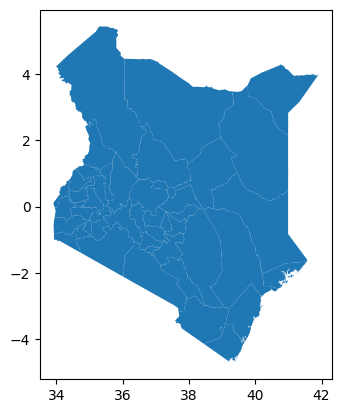

In [240]:
! wget -q -O kenya_counties1.zip 'https://github.com/Brian13Noble/GIS/blob/main/kenya_county_boundary.zip'
!ls
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Datasets/kenya_county_boundary.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
kenya_counties1=gpd.read_file('kenya_county_boundary.shp') #load the shapefile with gpd as kenya_counties
#Make the map
kenya_counties1.plot()

In [241]:
kenya_counties1 = pd.merge(
    left=kenya_counties1,
    right=kenya_pop,
    left_on='COUNTY',
    right_on='County',
    how='outer', indicator=True
)

In [242]:
kenya_counties1[['COUNTY','County','_merge']]

,COUNTY,County,_merge
0,Turkana,Turkana,both
1,Marsabit,Marsabit,both
2,Mandera,Mandera,both
3,Wajir,Wajir,both
4,West Pokot,West Pokot,both
5,Samburu,Samburu,both
6,Isiolo,Isiolo,both
7,Baringo,Baringo,both
8,Keiyo-Marakwet,Keiyo-Marakwet,both
9,Trans Nzoia,Trans Nzoia,both


In [243]:
kenya_counties1.dtypes

OBJECTID               float64
AREA_                  float64
PERIMETER              float64
COUNTY3_               float64
COUNTY3_ID             float64
COUNTY                  object
Shape_Leng             float64
Shape_area             float64
Shape_len              float64
geometry              geometry
County                  object
Total_Population09       int64
Total_Population19       int64
LandArea                 int64
Population_Density       int64
pop_change             float64
_merge                category
dtype: object

In [244]:
#print(kenya_counties.info())

<Axes: >

[]

[]

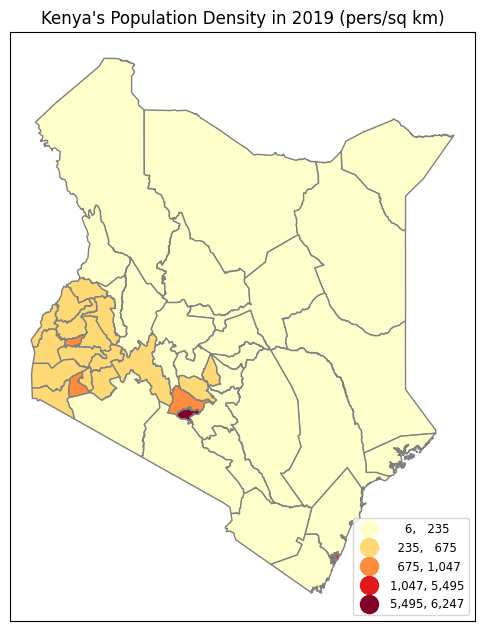

In [245]:
fig, ax = plt.subplots(1, figsize=(6,10))
kenya_counties1.plot(ax=ax,column='Population_Density',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
ax.title.set_text("Kenya's Population Density in 2019 (pers/sq km)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

The map shows the skewed distribution of population, which reflects in many schools in kenya. Notably, there are densey and sparsely populated regions in Kenya. Sparsely populated areas are mostly affected by insecurity, prolonged drought, and poor infrastructure. Such factors pose a great challenge in the implementation of the new Competence Based education curriculum in kenya

<Axes: >

[]

[]

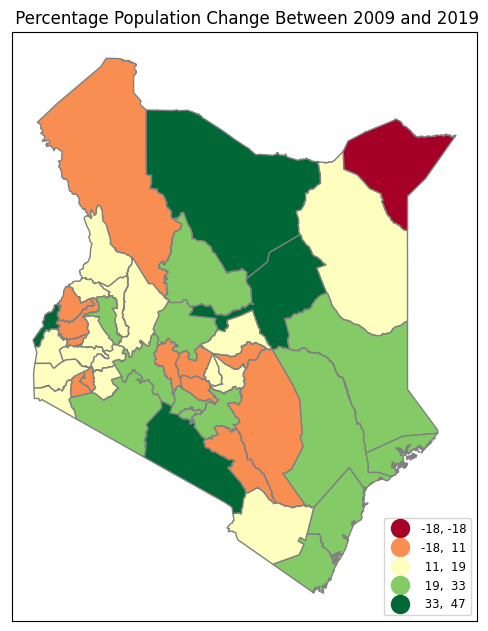

In [246]:
fig, ax = plt.subplots(1, figsize=(6,10))
kenya_counties1.plot(ax=ax,column='pop_change',legend=True,cmap='RdYlGn',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
ax.title.set_text(" Percentage Population Change Between 2009 and 2019")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


From the map above, it is evident that many counties in Kenya experience an increase in population by more than 20% except Mandera county that experienced a decline in population. It is worth noting that Mandera county borders Somalia and therefore is affected by insecurity and prolonged drought. Such population changes also reflect in schools.  

<Axes: >

[]

[]

<Axes: >

[]

[]

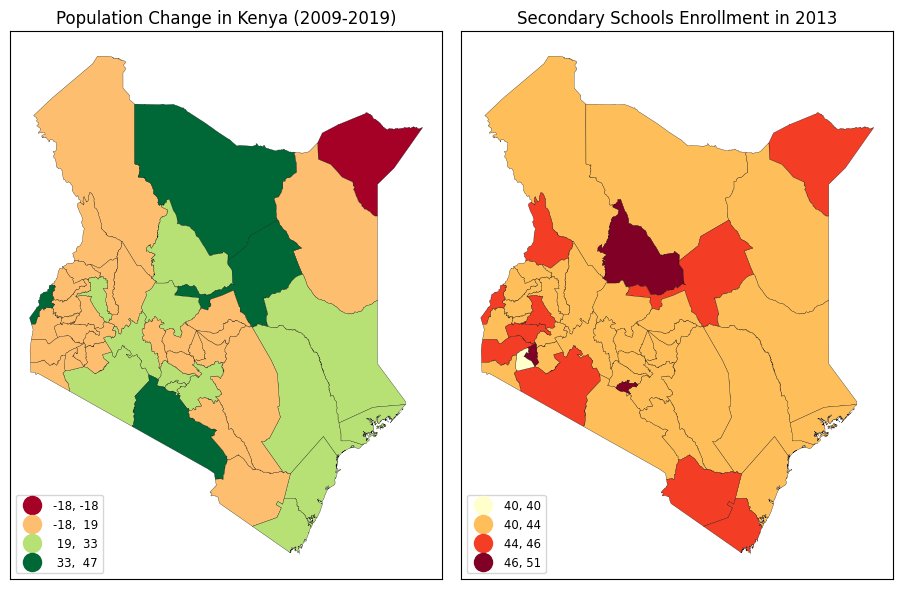

In [247]:
fig, axs = plt.subplots(1,2, figsize=(10,6),sharey=True, tight_layout=True)
kenya_counties1.plot(ax=axs[0],column='pop_change',legend=True,cmap='RdYlGn',scheme='natural_breaks',k=4,
         edgecolor='black',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Population Change in Kenya (2009-2019)")
axs[0].set_xticks([]); axs[0].set_yticks([])

kenya_counties.plot(ax=axs[1],column='ECHANGE',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=4,
         edgecolor='black',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Secondary Schools Enrollment in 2013")
axs[1].set_xticks([]); axs[1].set_yticks([])

The population increase in 2019 in many counties in Kenya indicates explains the significant improvement in enrollments in secondary schools experienced in 2013. Generally, some counties are more populated than others and that explains why the disparities in enrollment rates among counties in 2013. Generally, central and eastern counties have a higher population and high enrolment rates because of the conducive climatic conditions that favor agriculture, trade and urbanization.      

<Axes: >

[]

[]

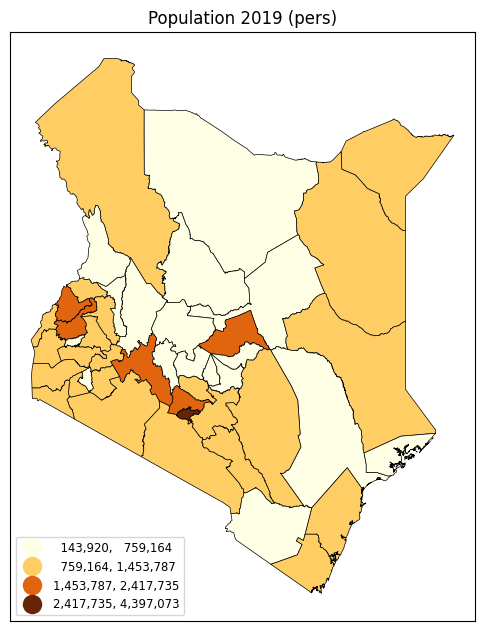

In [248]:
fig, ax = plt.subplots(1, figsize=(6,10))
kenya_counties1.plot(ax=ax,column='Total_Population19',legend=True,cmap='YlOrBr',scheme='natural_breaks',k=4,
         edgecolor='black',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #
ax.title.set_text("Population 2019 (pers)")
ax.set_xticks([]); ax.set_yticks([])

In [249]:
#import numpy as np
kcP = kenya_counties1.copy()
kcP["geometry"] = kcP["geometry"].centroid

<ipython-input-249-44c910c65149>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  kcP["geometry"] = kcP["geometry"].centroid


<Axes: >

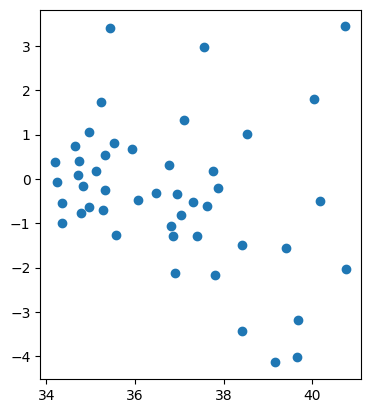

In [250]:
kcP.plot()

The plot shows that many central and south Eastern counties have a significantly higher population that other counties.

<Axes: >

[]

[]

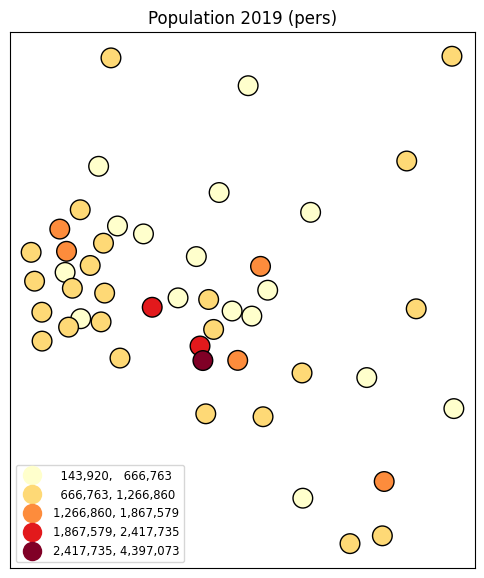

In [251]:
fig, ax = plt.subplots(1, figsize=(6,10))
kcP.plot(ax=ax,column='Total_Population19',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #
ax.title.set_text("Population 2019 (pers)")
ax.set_xticks([]); ax.set_yticks([])

In [252]:
kenya_pop.dtypes

County                 object
Total_Population09      int64
Total_Population19      int64
LandArea                int64
Population_Density      int64
pop_change            float64
dtype: object

<Axes: >

<Axes: >

[]

[]

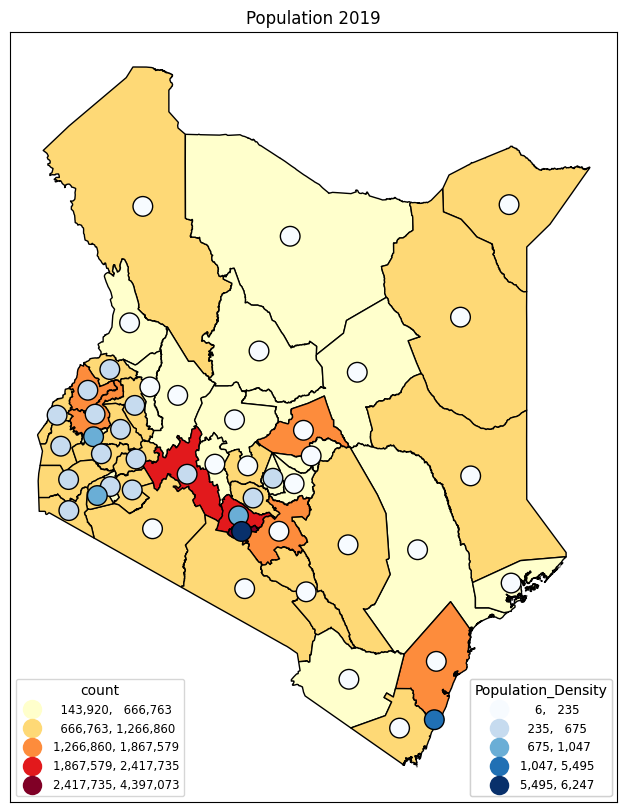

In [256]:
fig, ax = plt.subplots(1, figsize=(10,10))
kenya_counties1.plot(ax=ax,column='Total_Population19',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''count''')

kcP.plot(ax=ax,column='Population_Density',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #

ax.title.set_text("Population 2019")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''density''')



ax.add_artist(l2)
ax.add_artist(l1)
l2.set_title('''Population_Density''')


Nairobi county, the capital city of Kenya and counties bordering the Lake Victoria region are densely populated compared to other counties.    

In [315]:
data = "/content/drive/MyDrive/Datasets/2019 census vs Ministry data.xlsx"
data = pd.read_excel(data,skiprows=4)
#data

In [282]:
data.rename(columns={'KENYA': 'County'}, inplace=True)
data.rename(columns={10064301: 'census_total'}, inplace=True)
data.rename(columns={5109583: 'census_male'}, inplace=True)
data.rename(columns={4954718: 'census_Female'}, inplace=True)
data.rename(columns={10072040: 'Min_Total'}, inplace=True)
data.rename(columns={5105788: 'Min_Male'}, inplace=True)
data.rename(columns={4966252: 'Min_Female'}, inplace=True)
data.rename(columns={-0.07689555389887484: 'dev_Total'}, inplace=True)
data.rename(columns={0.07427220577491353: 'dev_Male'}, inplace=True)
data.rename(columns={-0.23278822326517876: 'dev_Female'}, inplace=True)
data

,County,census_total,census_male,census_Female,Min_Total,Min_Male,Min_Female,dev_Total,dev_Male,dev_Female
0,Mombasa,200140,99370,100770,155337,77728,77609,22.385830,21.779209,22.984023
1,Kwale,208512,106403,102109,203634,103499,100135,2.339434,2.729246,1.933228
2,Kilifi,375381,190072,185309,353254,175554,177700,5.894544,7.638158,4.106115
3,Tana River,55350,28122,27228,59674,30591,29083,-7.812105,-8.779603,-6.812840
4,Lamu,30722,15673,15049,32359,16518,15841,-5.328429,-5.391438,-5.262808
5,Taita-Taveta,67949,34844,33105,67177,34246,32931,1.136146,1.716221,0.525600
6,Garissa,71860,40904,30956,77465,42751,34714,-7.799889,-4.515451,-12.139811
7,Wajir,78332,43435,34897,76959,43883,33076,1.752796,-1.031426,5.218214
8,Mandera,104585,54796,49789,102503,64676,37827,1.990725,-18.030513,24.025387
9,Marsabit,67252,33750,33502,64787,32373,32414,3.665319,4.080000,3.247567


In [314]:
teacher_pop= data[['County','Min_Total', 'Min_Male','Min_Female','dev_Total']]
teacher_pop= teacher_pop.iloc[0:,:]
teacher_pop

,County,Min_Total,Min_Male,Min_Female,dev_Total
0,Mombasa,155337,77728,77609,22.385830
1,Kwale,203634,103499,100135,2.339434
2,Kilifi,353254,175554,177700,5.894544
3,Tana River,59674,30591,29083,-7.812105
4,Lamu,32359,16518,15841,-5.328429
5,Taita-Taveta,67177,34246,32931,1.136146
6,Garissa,77465,42751,34714,-7.799889
7,Wajir,76959,43883,33076,1.752796
8,Mandera,102503,64676,37827,1.990725
9,Marsabit,64787,32373,32414,3.665319


In [319]:
teacher_pop.loc[teacher_pop['County'] == 'Nairobi City', 'County'] = 'Nairobi'
teacher_pop.loc[teacher_pop['County'] == 'Homabay', 'County'] = 'Homa Bay'
teacher_pop.loc[teacher_pop['County'] == 'Elgeyo-Marakwet', 'County'] = 'Keiyo-Marakwet'
teacher_pop.loc[teacher_pop['County'] == 'Tharaka-Nithi', 'County'] = 'Tharaka'
teacher_pop.loc[teacher_pop['County'] == 'Taita-Taveta', 'County'] = 'Taita Taveta'

credit_license.txt			      kenya_county_boundary.cst
drive					      kenya_county_boundary.dbf
kenya_administrative_province_boundaries.dbf  kenya_county_boundary.prj
kenya_administrative_province_boundaries.prj  kenya_county_boundary.shp
kenya_administrative_province_boundaries.shp  kenya_county_boundary.shx
kenya_administrative_province_boundaries.shx  kenya_prov.zip
kenya_administrative_province_boundaries.zip  sample_data
kenya_counties1.zip			      wfsrequest.txt
kenya_counties.zip


<Axes: >

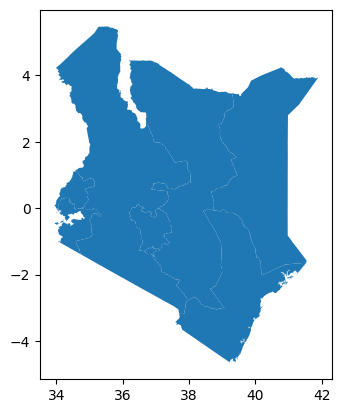

In [320]:
! wget -q -O kenya_prov.zip 'https://github.com/Brian13Noble/GIS/blob/main/kenya_administrative_province_boundaries.shp.zip.zip' #aok: error: was nj_counties
!ls
zip_ref = zipfile.ZipFile('kenya_administrative_province_boundaries.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
kenya_prov=gpd.read_file('kenya_administrative_province_boundaries.shp') #load the shapefile with gpd as kenya_counties
#Make the map
kenya_prov.plot()


In [311]:
#kenya_counties.dtypes

<Axes: >

<Axes: >

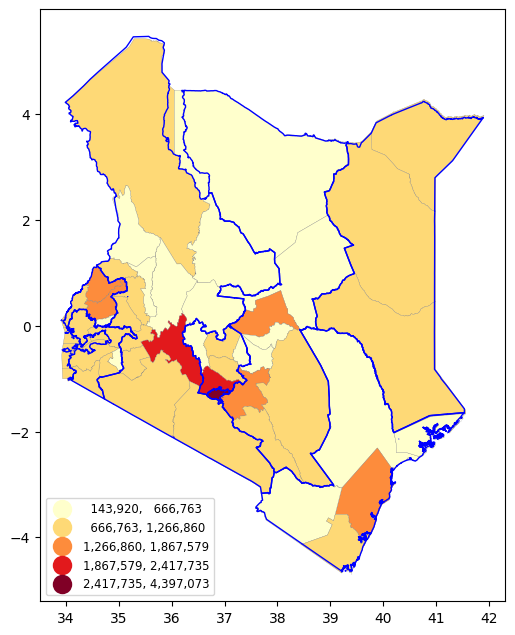

In [310]:
fig, ax = plt.subplots(1, figsize=(6,10))
kenya_counties1.plot(ax=ax,column='Total_Population19',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
kenya_prov.plot(ax=ax,edgecolor='blue',linewidth=1, facecolor="none") #alpha=0.1)

From the map above the coast, central, and Nyanza provinces are densely populated. Generally, over the past 10 years, Kenya's population has grown significantly and that has resulted to the improvement of the economy. However, the distribution of the Kenyan population is affected maainly by climatic conditions, security, employment opportunities, availability of food and water, among others. Importantly, the downsides of population growth are evident in learning institutions. While there are many learners joining primary, secondary and university institutions, the county and national governments are striving to improve the quality of education. The primary challenge therefore facing the CBC education system in Kenya is scarcity of resources accelerated by growth of population that has significantly increased the enrollment rates.

In [309]:
kenya_counties.dtypes

OBJECTID       float64
AREA_          float64
PERIMETER      float64
COUNTY3_       float64
COUNTY3_ID     float64
COUNTY          object
Shape_Leng     float64
Shape_area     float64
Shape_len      float64
geometry      geometry
County          object
Min_Total      float64
Min_Male       float64
Min_Female     float64
dev_Total      float64
_merge        category
dtype: object

In [329]:
#teacher_pop
kenya_counties = pd.merge(
    left=kenya_counties,
    right=teacher_pop,
    left_on='COUNTY',
    right_on='County',
    how='outer', indicator=True
)

In [330]:
kenya_counties[['COUNTY','County','_merge']]

,COUNTY,County,_merge
0,Turkana,Turkana,both
1,Marsabit,Marsabit,both
2,Mandera,Mandera,both
3,Wajir,Wajir,both
4,West Pokot,West Pokot,both
5,Samburu,Samburu,both
6,Isiolo,Isiolo,both
7,Baringo,Baringo,both
8,Keiyo-Marakwet,Keiyo-Marakwet,both
9,Trans Nzoia,Trans Nzoia,both


<Axes: >

[]

[]

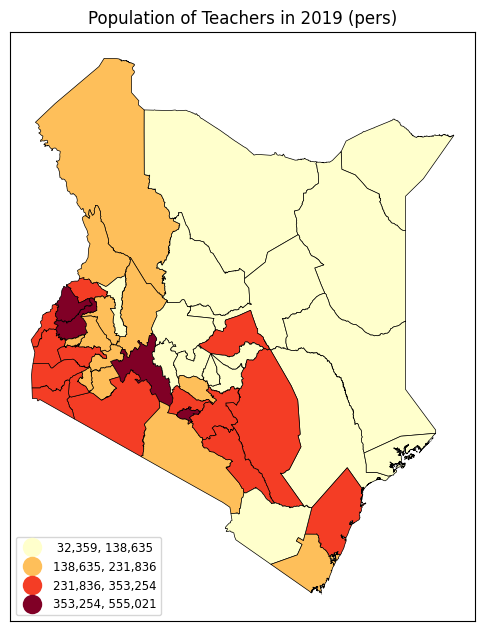

In [335]:
fig, ax = plt.subplots(1, figsize=(6,10))
kenya_counties.plot(ax=ax,column='Min_Total',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=4,
         edgecolor='black',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #
ax.title.set_text("Population of Teachers in 2019 (pers)")
ax.set_xticks([]); ax.set_yticks([])

The map also shows that the number and distribution of teachers is another significant challenge facing the new Kenyan education system. Notably, counties with the highest population have more teachers compared with those that are sparsely populated. However, the population of students in those areas does not match with the number of teachers employed by the ministry. Additionally, counties with a few number of teachers are hardship areas and are characterized by insecurity, drought, and poor infrastruture. Such counties have a great challenge of implementing the new education system that relies heavily on technology and modernized classrooms.

** Resources **
https://data.humdata.org/dataset/kenya-population-per-county-from-census-report-2019?

https://www.knbs.or.ke/data-tables/

https://map.igismap.com/gis-data/kenya/administrative_national_boundary

https://data.world/

